In [7]:
pwd

'C:\\Users\\Shree'

In [8]:
print("Hello World")

Hello World


In [9]:
import numpy as np
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()


In [10]:
print("Features: ", cancer.feature_names)
print(len(cancer.feature_names))

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [11]:
print("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


In [12]:
cancer.data.shape

(569, 30)

In [13]:
cancer.target.shape

(569,)

In [14]:
import pandas as pd

In [15]:
df1=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [16]:
df1.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [17]:
df2=pd.DataFrame(cancer.target,columns=["Labels"])

In [18]:
df2.value_counts()

Labels
1         357
0         212
dtype: int64

In [19]:
df3=pd.concat([df1,df2],axis=1)


In [20]:
df3['Labels'].unique()


array([0, 1])

In [21]:
df3['Labels'].value_counts()


1    357
0    212
Name: Labels, dtype: int64

In [22]:
df3.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Labels                     0
dtype: int64

In [23]:
cancer.data.shape


(569, 30)

<AxesSubplot:>

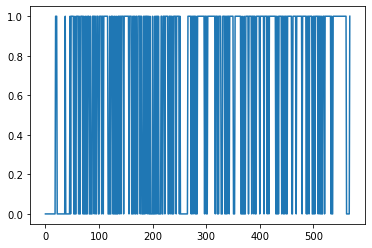

In [24]:
df3['Labels'].plot()

In [25]:
cor=df3.corr()

<AxesSubplot:>

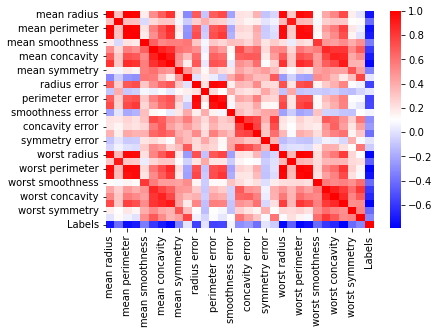

In [26]:
import seaborn as sns
sns.heatmap(cor,square=False,cmap='bwr')

In [27]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)

In [28]:
X_train.shape

(398, 30)

In [29]:
X_test.shape

(171, 30)

In [30]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
clf


SVC(kernel='linear')

In [32]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [33]:
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


In [34]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [35]:
from sklearn.metrics import classification_report
print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))


The classification report is as follows...

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [36]:
y_pred_df=pd.DataFrame(y_pred,columns=["Predicted_Output"])
y_test_df=pd.DataFrame(y_test,columns=["actual_Output"]) 

In [37]:
y_test_df

,actual_Output
0,1
1,1
2,0
3,0
4,1
...,...
166,1
167,0
168,1
169,1


In [38]:
y_final=pd.concat([y_pred_df,y_test_df],axis=1)

In [39]:
y_final

,Predicted_Output,actual_Output
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
166,1,1
167,0,0
168,1,1
169,1,1


In [40]:
pwd

'C:\\Users\\Shree'